<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

### GRUPO 13:
#### Mariano Martín Gualpa ( mgualpa@gmail.com )
#### Laercio Simoes ( laercio@hpcbrasil.com )

In [2]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn

In [3]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [4]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [5]:
dataset[:10]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN
3,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Comisaría,NaN,"Mala alimentación, Malas condiciones de alojam...",NaN,Alejamiento de vínculos,NaN,NaN,NaN,Policia Provincial,Comisaria Nº 3 de Rafael Castillo,NaN
4,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN
5,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,Alejamiento de vínculos,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN
6,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,"Denegación de acceso atención terapéutica, Fal...",NaN,Servicio Penitenciario Provincial,UPP Nº 49 JUNIN,NaN
7,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,Alejamiento de vínculos,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN
8,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,"Denegación acceso atención médica, Falta de ac...",NaN,Servicio Penitenciario Provincial,UPP Nº 28 de Magdalena,NaN
9,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,Otras formas de maltrato psicológico,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 42 de Florencio Varela,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [6]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [7]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?



### La política para datos faltantes adoptada es:
* Se eliminan los registros donde el año o la provincia tienen valor faltante (NaN). Esta decisión podría afectar mínimamente a las probabilidades del punto 6.


In [8]:
print("La política para datos faltantes adoptada fue que se eliminan los registros donde el año o la provincia tienen valor faltante (NaN).\nEsta decisión podría afectar mínimamente a las probabilidades del punto 6")
print("Tamaño dataset antes de limpieza: ", dataset.shape)
dataset = dataset.dropna(subset=['year', 'provincia'])
print("Tamaño dataset despues de limpieza: ", dataset.shape)

La política para datos faltantes adoptada fue que se eliminan los registros donde el año o la provincia tienen valor faltante (NaN).
Esta decisión podría afectar mínimamente a las probabilidades del punto 6
Tamaño dataset antes de limpieza:  (1439, 18)
Tamaño dataset despues de limpieza:  (1305, 18)


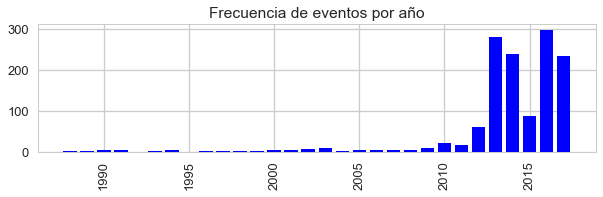

In [9]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

def plot_chart(x, y, title, show_line=True):
    plt.figure(figsize=(10,8))
    plt.subplot(313)
    plt.bar(x, y, color="blue")
    plt.xticks(rotation=90)
    if (show_line):
        plt.plot(x, y, color="red", linestyle='--')
    plt.title(title)

eventCountsByYear = dataset.year.value_counts().sort_index()
x = eventCountsByYear.index
plot_chart(x, eventCountsByYear.values, "Frecuencia de eventos por año", show_line=False)


Probabilidad de año en que ocurrio el evento
-------------------------------------------------------------------------------
1988.0    0.000766
1989.0    0.000766
1990.0    0.003831
1991.0    0.003831
1993.0    0.001533
1994.0    0.002299
1996.0    0.000766
1997.0    0.000766
1998.0    0.001533
1999.0    0.000766
2000.0    0.002299
2001.0    0.002299
2002.0    0.005364
2003.0    0.006897
2004.0    0.001533
2005.0    0.002299
2006.0    0.002299
2007.0    0.003831
2008.0    0.003831
2009.0    0.007663
2010.0    0.016092
2011.0    0.012261
2012.0    0.046743
2013.0    0.214559
2014.0    0.181609
2015.0    0.066667
2016.0    0.227586
2017.0    0.179310
Name: year, dtype: float64


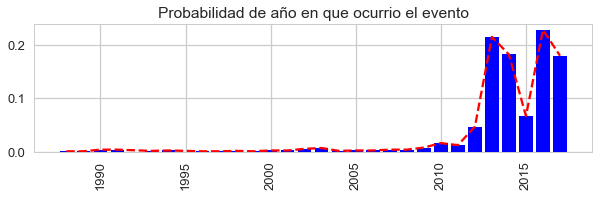

In [10]:
eventProbabilitiesByYear = dataset.year.value_counts(normalize=True).sort_index()
print("Probabilidad de año en que ocurrio el evento")
print("-------------------------------------------------------------------------------")
print(eventProbabilitiesByYear)

y = eventProbabilitiesByYear.values

plot_chart(x, eventProbabilitiesByYear.values, "Probabilidad de año en que ocurrio el evento", show_line=True)


#### ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

Se observa que el gráfico de frecuencias y el grafico de probabilidades son similares, aunque en distinta escala pues en uno muestra la cantidad de eventos y en el otro la probabilidad de que dado un evento, ocurra en un año determinado. En general tienen diferentes aplicaciones, pues el primero sirve para conocer las cantidades de eventos que se presentaron en valor absoluto y ayudaría a responder preguntas como "¿en que años se tuvo mas de 200 eventos?", en el segundo con la probabilidad se observa que es mas probable la aparición de incidentes durante los últimos años.
En general puede resultar mas común el uso de la distribución de probabilidad.

#### ¿A qué se debe la forma de la distribución? 
Podrían existir diferentes causas que expliquen la distribución, que deberían estudiarse con mayor profundidad en estudios complementarios para poder validarse como hipótesis. Ejemplos de estas hipótesis que sería interesante estudiar son: disponibilidad de registros, cambios en los procediminetos o criterios de medición, aumento de la población carcelaria, cambios en las políticas de gobierno respecto a derechos humanos, conflictividad social, cambio en las políticas de seguridad y represión, crisis económica a nivel global y muchas otras, aunque como se dijo ninguna puede confirmarse sin un estudio mas detallado.

#### ¿Qué tendencia muestra?  ¿Ha aumentado la violencia institucional en los últimos años?
Se observa que la cantidad de eventos de violencia institucional a aumentado en los últimos seis años. Con una anomalía en el 2015 que podría haber sido afectada por el hecho de ser un año de elecciones presidenciales.


#### Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

Probabilidad Acumulada de año en que ocurrio el evento
-------------------------------------------------------------------------------
1988.0    0.000766
1989.0    0.001533
1990.0    0.005364
1991.0    0.009195
1993.0    0.010728
1994.0    0.013027
1996.0    0.013793
1997.0    0.014559
1998.0    0.016092
1999.0    0.016858
2000.0    0.019157
2001.0    0.021456
2002.0    0.026820
2003.0    0.033716
2004.0    0.035249
2005.0    0.037548
2006.0    0.039847
2007.0    0.043678
2008.0    0.047510
2009.0    0.055172
2010.0    0.071264
2011.0    0.083525
2012.0    0.130268
2013.0    0.344828
2014.0    0.526437
2015.0    0.593103
2016.0    0.820690
2017.0    1.000000
Name: year, dtype: float64
Prob(Y<=2015) =  0.5931034482758621


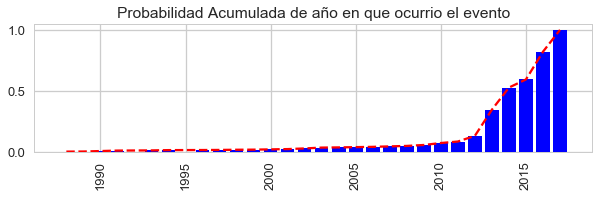

In [11]:
accEventProbabilitiesByYear = eventProbabilitiesByYear.cumsum()
print("Probabilidad Acumulada de año en que ocurrio el evento")
print("-------------------------------------------------------------------------------")
print(accEventProbabilitiesByYear)
plot_chart(x, accEventProbabilitiesByYear.values, "Probabilidad Acumulada de año en que ocurrio el evento", show_line=True)
print("Prob(Y<=2015) = ", accEventProbabilitiesByYear[2015])


Según se observa en la tabla de probabilidades acumuladas y considerando que el cambio de gobierno (por granularidad de los datos) se da en el cambio entre 2015 y 2016, podemos decir que dado un evento de violencia institucional producido durante el rango [1988, 2017], la probabilidad de que ocurriese antes del último cambio de gobierno es:

$$ P(Y \leq 2015) = 0.593103 $$ 

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

Probabilidad de provincia donde ocurrio el evento
-------------------------------------------------------------------------------
Buenos Aires              0.685057
Catamarca                 0.000766
Chaco                     0.022222
Chubut                    0.026054
Ciudad de Buenos Aires    0.085824
Corrientes                0.003065
Córdoba                   0.039847
Entre Rios                0.006897
Formosa                   0.007663
Jujuy                     0.005364
La Pampa                  0.007663
La Rioja                  0.004598
Mendoza                   0.012261
Misiones                  0.008429
Neuquen                   0.014559
Rio Negro                 0.019157
Salta                     0.012261
San Juan                  0.002299
San Luis                  0.002299
Santa Cruz                0.003065
Santa Fe                  0.014559
Santiago del Estero       0.007663
Tierra del Fuego          0.001533
Tucuman                   0.006897
Name: provincia, dtype: float6

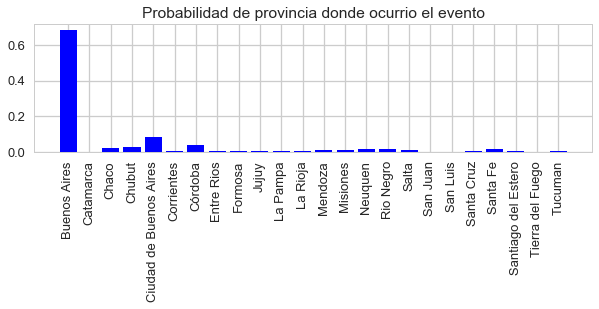

In [12]:
eventProbabilitiesByProvincia = dataset.provincia.value_counts(normalize=True).sort_index()
print("Probabilidad de provincia donde ocurrio el evento")
print("-------------------------------------------------------------------------------")
print(eventProbabilitiesByProvincia)

y = eventProbabilitiesByProvincia.values

plot_chart(eventProbabilitiesByProvincia.index, eventProbabilitiesByProvincia.values, "Probabilidad de provincia donde ocurrio el evento", show_line=False)


### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


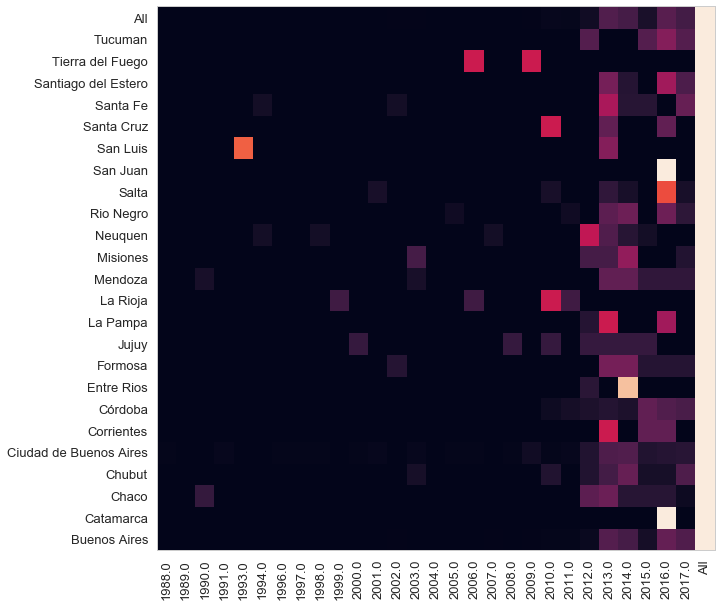

La tabla muestra, por cada provincia, la distribución de probabilidad de año del evento: Puede observarse que en cada provincia tiende a crecer la probabilidad a medida que aumenta el año.
-------------------------------------------------------------------------------


year,1988.0,1989.0,1990.0,1991.0,1993.0,1994.0,1996.0,1997.0,1998.0,1999.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,All
provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,0.000000,0.001119,0.000000,0.003356,0.000000,0.001119,0.000000,0.000000,0.000000,0.000000,...,0.004474,0.008949,0.010067,0.023490,0.219239,0.183445,0.054810,0.260626,0.209172,1.0
Catamarca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
Chaco,0.000000,0.000000,0.137931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.241379,0.275862,0.103448,0.103448,0.103448,0.034483,1.0
Chubut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.088235,0.000000,0.088235,0.176471,0.264706,0.058824,0.058824,0.205882,1.0
Ciudad de Buenos Aires,0.008929,0.000000,0.000000,0.017857,0.000000,0.000000,0.008929,0.008929,0.008929,0.000000,...,0.044643,0.008929,0.017857,0.089286,0.205357,0.214286,0.089286,0.098214,0.107143,1.0
Corrientes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0.250000,0.000000,1.0
Córdoba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.038462,0.057692,0.076923,0.096154,0.076923,0.250000,0.211538,0.192308,1.0
Entre Rios,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.888889,0.000000,0.000000,0.000000,1.0
Formosa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.300000,0.300000,0.100000,0.100000,0.100000,1.0


In [13]:
def percConvert(ser):
  return ser/float(ser[-1])

table = pd.crosstab(index=dataset['provincia'], columns=dataset['year'], margins=True).apply(percConvert,axis=1)
plt.figure(figsize=(10,10))
plt.pcolor(table)
plt.yticks(numpy.arange(0.5, len(table.index), 1), table.index)
plt.xticks(numpy.arange(0.5, len(table.columns), 1), table.columns)
plt.xticks(rotation=90)
plt.show()


print("La tabla muestra, por cada provincia, la distribución de probabilidad de año del evento: Puede observarse que en cada provincia tiende a crecer la probabilidad a medida que aumenta el año.")
print("-------------------------------------------------------------------------------")
table

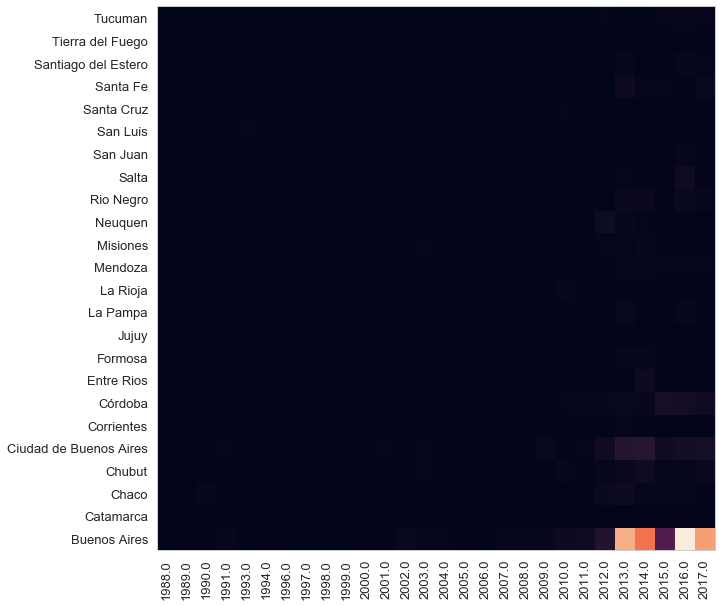

Tabla con distribución de probabilidad de ambas variables a la vez (probabilidad conjunta): 
Lógicamente, las probabilidades conjunta mas altas corresponden a provincias mas pobladas y a mayor valor de año.
-------------------------------------------------------------------------------


year,1988.0,1989.0,1990.0,1991.0,1993.0,1994.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,0.000000,0.000766,0.000000,0.002299,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,...,0.002299,0.003065,0.006130,0.006897,0.016092,0.150192,0.125670,0.037548,0.178544,0.143295
Catamarca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000
Chaco,0.000000,0.000000,0.003065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005364,0.006130,0.002299,0.002299,0.002299,0.000766
Chubut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002299,0.000000,0.002299,0.004598,0.006897,0.001533,0.001533,0.005364
Ciudad de Buenos Aires,0.000766,0.000000,0.000000,0.001533,0.000000,0.000000,0.000766,0.000766,0.000766,0.000000,...,0.000766,0.003831,0.000766,0.001533,0.007663,0.017625,0.018391,0.007663,0.008429,0.009195
Corrientes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001533,0.000000,0.000766,0.000766,0.000000
Córdoba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001533,0.002299,0.003065,0.003831,0.003065,0.009962,0.008429,0.007663
Entre Rios,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.006130,0.000000,0.000000,0.000000
Formosa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002299,0.002299,0.000766,0.000766,0.000766


In [14]:
#table = pd.crosstab(index=dataset['year'], columns=dataset['provincia'], margins=True)

tableJoin = pd.crosstab(index=dataset['provincia'], columns=dataset['year'], margins=False).apply(lambda r: r/len(dataset),axis=1)

plt.figure(figsize=(10,10))
plt.pcolor(tableJoin)
plt.yticks(numpy.arange(0.5, len(tableJoin.index), 1), tableJoin.index)
plt.xticks(numpy.arange(0.5, len(tableJoin.columns), 1), tableJoin.columns)
plt.xticks(rotation=90)
plt.show()
print("Tabla con distribución de probabilidad de ambas variables a la vez (probabilidad conjunta): \nLógicamente, las probabilidades conjunta mas altas corresponden a provincias mas pobladas y a mayor valor de año.")
print("-------------------------------------------------------------------------------")
tableJoin

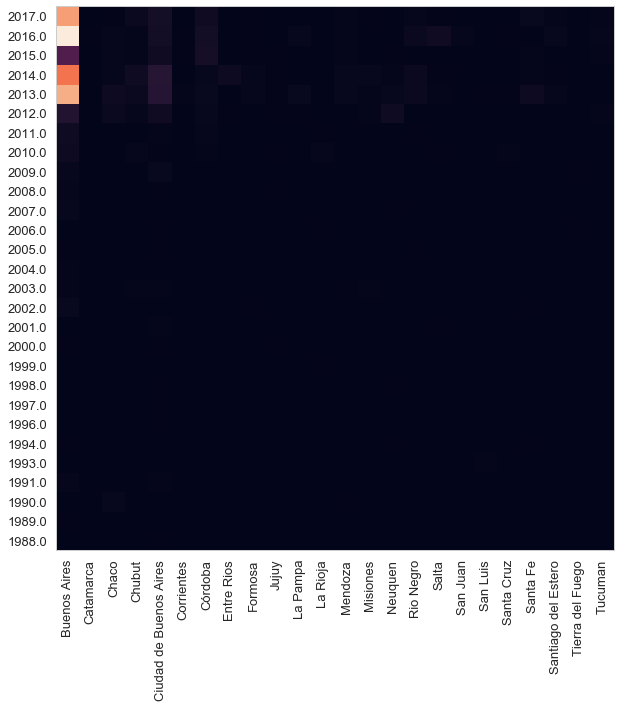

Tabla con distribución de frecuencia para ambas variables:
----------------------------------------------------------


provincia,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad de Buenos Aires,Corrientes,Córdoba,Entre Rios,Formosa,Jujuy,...,Rio Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucuman,All
year,,,,,,,,,,,,,,,,,,,,,
1988.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1989.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1990.0,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1991.0,3,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1993.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2
1994.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
1996.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1997.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [15]:
frecuencyTableWithMargin = pd.crosstab(index=dataset['year'], columns=dataset['provincia'], margins=True)

frecuencyTable = pd.crosstab(index=dataset['year'], columns=dataset['provincia'], margins=False)

plt.figure(figsize=(10,10))
plt.pcolor(frecuencyTable)
plt.yticks(numpy.arange(0.5, len(frecuencyTable.index), 1), frecuencyTable.index)
plt.xticks(numpy.arange(0.5, len(frecuencyTable.columns), 1), frecuencyTable.columns)
plt.xticks(rotation=90)
plt.show()
print("Tabla con distribución de frecuencia para ambas variables:")
print("----------------------------------------------------------")
frecuencyTableWithMargin

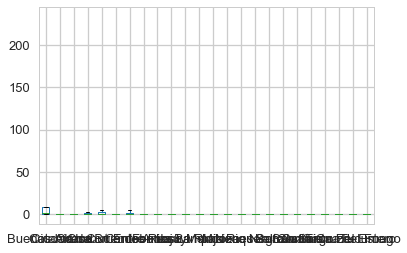

In [20]:
### NUEVO CORRECCIONES MILAGROS

frecuencyTable[2:].boxplot()


## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

Probabilidad por contexto1 en que ocurrio el evento:
----------------------------------------------------
Centros de Alojamiento para Personas Menores de Edad                   0.000784
Centros de Detención Preventiva                                        0.004706
Centros de Detención Previos al Juicio (Alcaidia)                      0.012549
Comisaría                                                              0.090196
Domicilio Particular                                                   0.016471
Escuelas de Formación Fuerzas Nacionales                               0.000784
Escuelas de Formación Fuerzas Provinciales                             0.002353
Espacio Público                                                        0.160784
Establecimiento de Rehabilitación de Adicciones                        0.000784
Establecimiento de Salud Mental                                        0.005490
Hospital General                                                       0.003137
Instalaciones 

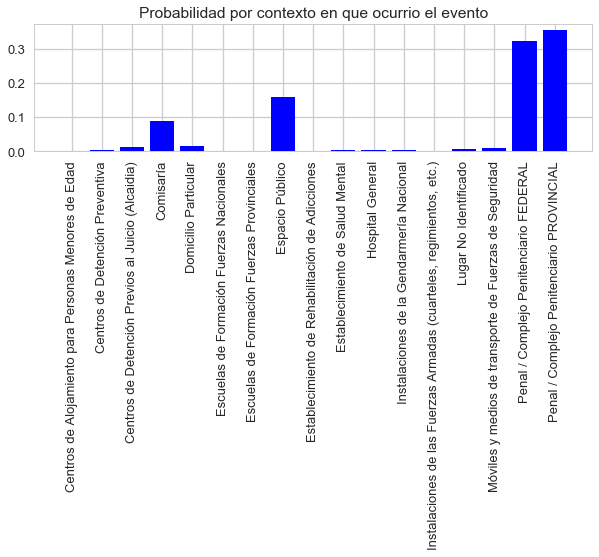

In [166]:
eventProbabilitiesByContexto1 = dataset.contexto1.value_counts(normalize=True).sort_index()
print("Probabilidad por contexto1 en que ocurrio el evento:")
print("----------------------------------------------------")
print(eventProbabilitiesByContexto1)
contextosX = eventProbabilitiesByContexto1.index

plot_chart(contextosX, eventProbabilitiesByContexto1.values, "Probabilidad por contexto en que ocurrio el evento", show_line=False)



## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

In [167]:
violenciaFisicaSerie = dataset.violencia_fisica.notnull()
violenciaPsiquicaSerie = dataset.violencia_psiquica.notnull()

violenciaFrecuencyTableWithMargin = pd.crosstab(index=violenciaFisicaSerie, columns=violenciaPsiquicaSerie, margins=True)
print("Frecuencas:")
print(violenciaFrecuencyTableWithMargin)
print("")
print("Probabilidades P(M | N):")
probV = violenciaFrecuencyTableWithMargin/violenciaFrecuencyTableWithMargin.ix['All']
print(probViolenciaFrecuencyTableWithMargin)


probPriori_N_False = violenciaFrecuencyTableWithMargin.iloc[2, 0] / violenciaFrecuencyTableWithMargin.iloc[2, 2]
probPriori_N_True = violenciaFrecuencyTableWithMargin.iloc[2, 1] / violenciaFrecuencyTableWithMargin.iloc[2, 2]
print("Probabilidad a priori de N Falso: P(N=False)", probPriori_N_False) 
print("Probabilidad a priori de N Verdadero: P(N=True)", probPriori_N_True)
print("")
print("")
probPosteriori_N_True = (probV.iloc[1, 1] * probPriori_N_True) / ((probV.iloc[1, 0] * probPriori_N_False) + (probV.iloc[1, 1] * probPriori_N_True))
print("Dado M Verdadero (V. Física) la probabilidad de N Verdadero (V. PSIQUICA) es P(N | M):", probPosteriori_N_True)

print("Otra forma: ", violenciaFrecuencyTableWithMargin.iloc[1, 1] / violenciaFrecuencyTableWithMargin.iloc[1, 2])

Frecuencas:
violencia_psiquica  False  True   All
violencia_fisica                     
False                 432   323   755
True                  438   112   550
All                   870   435  1305

Probabilidades P(M | N):
violencia_psiquica     False      True       All
violencia_fisica                                
False               0.496552  0.742529  0.578544
True                0.503448  0.257471  0.421456
All                 1.000000  1.000000  1.000000
Probabilidad a priori de N Falso: P(N=False) 0.6666666666666666
Probabilidad a priori de N Verdadero: P(N=True) 0.3333333333333333


Dado M Verdadero (V. Física) la probabilidad de N Verdadero (V. PSIQUICA) es P(N | M): 0.20363636363636364
Otra forma:  0.20363636363636364


/Volumes/HDDatos1/anaconda/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?

La aplicación del teorema de Bayes permite obtener inferencias interesantes respecto a las probabilidades revisadas (a posteriori) que pueden ser utilizados para alimentar otros modelos (teoría de decisión en Universo Probabilístico, cálculo de valor esperado, simulación, etc). 


* ¿Podemos concluir en que son eventos independientes dadas las muestras?

Dado que las probabilidades a priori de N son diferentes de las probabilidades a posteriori de N (es decir las probabilidades condicionales de N dado M), podemos inferir que existe cierto nivel de dependencia entre ambas variables. Si las probabilidades a priori y a condicionales fuesen iguales, podríamos inferir independencia entre las variables.
